## Chapter 1: Two-Body Orbital Mechanics

Exercises done in this section: 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 1.11, 1.14, 1.16

In [11]:
# Importing math and plotting libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Problem 1.1

r = [2, 2, 2]
v = [-0.4, 0.2, 0.4]

h = np.cross(r, v)
# Assuming mu is equal to 1
e = np.dot(v,v)/2 - 1/np.linalg.norm(r)

print("Specific angular momentum: %a DU^2/TU" % h)
print("Total specific mechanical energy: %.4f DU^2/TU^2" % e)

Specific angular momentum: array([ 0.4, -1.6,  1.2]) DU^2/TU
Total specific mechanical energy: -0.1087 DU^2/TU^2


In [3]:
# Problem 1.2 

v = 45000
nu = 90
mu = 1.407*pow(10,16)
# Convert from n. mi to ft (approximated conversion)
r = 4000 * 6076

# Since nu = 90, p = r according to eq. 1.5-4
p = r
# We can also calculate h based on eq. 1.5-3
h = np.sqrt(r*mu)
# Total specific mechanical energy from Eq. 1.4-2
energy = pow(v,2)/2 - mu/r
# Eccentricity Eq. 1.6-4
e = np.sqrt(1+2*energy*pow(h,2)/(pow(mu,2)))
print("Eccentricity: %.3f" % e)


Eccentricity: 1.580


In [4]:
# Problem 1.3

# Convert from n.mi to ft (approximated)
rp = 100 * 6076
ra = 600 * 6076
mu = 1.407 * pow(10,16) # ft^3/s^2

a = (rp + ra)/2 # ft

TP = 2 * np.pi / np.sqrt(mu) * pow(a, 3/2)
print("Period of the orbit: %.2f sec" % TP)



Period of the orbit: 164.27 sec


### Problem 1.4

The n-body problem for n >= 3 is a chaotic dynamic system for most initialc conditions and no general-form solution exists. For the case of n=3 (three-body problem), for example, the dynamic system is described by a set of 9 second-order differention equations.  


In [5]:
# Problem 1.5

a = 30 * pow(10, 6)
e = 0.2
mu = 1.407 * pow(10,16) # ft^3/s^2

# Perigee and apogee
rP = a*(1 - e)
rA = 2*a - rP

print("Perigee: %.2e ft" % rP)
print("Apogee: %.2e ft" % rA)


# Total specific energy
energy = -mu / (2*a)
print("Total Specific Energy: %.2e ft^2/s^2" % energy)

# Semi-lactus rectum
p = rP * (1 + e)
print("Semi-lactus rectum (p): %.2e ft" % p)

r = p / (1 + e*np.cos(135*np.pi/180))
print("Length at 135: %.3e ft" % r)


Perigee: 2.40e+07 ft
Apogee: 3.60e+07 ft
Total Specific Energy: -2.34e+08 ft^2/s^2
Semi-lactus rectum (p): 2.88e+07 ft
Length at 135: 3.354e+07 ft


In [6]:
# Problem 1.9
r_earth = 2.092 * pow(10, 7) # ft
r0 = 300000 + r_earth # ft
v0 = 25000 # ft/s
phi = -60 # degrees
mu = 1.4076 * pow(10,16) # ft^3/s^2
# Convert to ft
rf = 100 * 6076 + r_earth # ft

energy = v0*v0/2 - mu/r0

vf = np.sqrt(2*energy + 2*mu/rf)

h = r0*v0*np.cos(phi*np.pi/180) 
cos_phif = h/(rf*24618)
phi_f = 180*np.arccos(cos_phif)/np.pi

print("Velocity: %i ft/s" % vf)
print("Flight Path Angle: %.3f degrees" % phi_f)



Velocity: 24617 ft/s
Flight Path Angle: 59.967 degrees


In [34]:
# Problem 1.11

r_earth = 2.092 * pow(10, 7) # ft
v0 = 10000 # ft/s
r0 = 100000 + r_earth # ft
mu = 1.4076 * pow(10, 16)

energy = v0*v0/2 - mu/r0

# Compute rf for vf = 0
rf = -mu/energy - r_earth
print("Maximum Altitude: %i ft" % rf)

Maximum Altitude: 1796124 ft


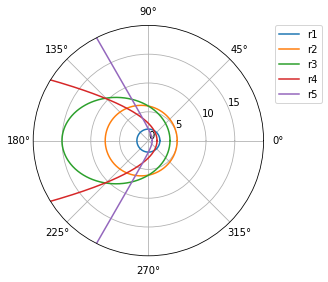

In [28]:
# Problem 1.14

#Given cases
p1 = 2
e1 = 0
p2 = 6
e2 = 0.2
p3 = 6
e3 = 0.6
p4 = 3
e4 = 1
p5 = 2
e5 = 2

# Setting range of nu
nu = np.arange(0, 2*np.pi, 0.01)

# Compute the orbit for each case
r1 = p1/(1 + e1*np.cos(nu))
r2 = p2/(1 + e2*np.cos(nu))
r3 = p3/(1 + e3*np.cos(nu))
r4 = p4/(1 + e4*np.cos(nu))
r5 = p5/(1 + e5*np.cos(nu))

#  Set axes options
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8], polar=True)
ax1.set_ylim(0,20)
ax1.set_yticks(np.arange(0, 20, 5))

# Create plots
ax1.plot(nu, r1, label='r1')
ax1.plot(nu, r2, label='r2')
ax1.plot(nu, r3, label='r3')
ax1.plot(nu, r4, label='r4')
ax1.plot(nu, r5, label='r5')

# Show plots
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.show()



### Problem 1.16

Given: 
a = 4DU

This way, using eq. 1.6-3:
Energy = -mu/(2a) = -mu/(8DU)

Rearranging eq. 1.4-2 and solving for v, we have: 
v = sqrt(2 * Energy + 2*mu/r)

Solving for r = a = 4DU and plugging in the value for energy: 
v = sqrt(-mu/(4DU) + 2*mu/(4DU)) = sqrt(mu/(4DU)) = 1/2*sqrt(mu/DU)

Now, compute the escape velocity from eq. 1.9-2:
Vesc = sqrt(2mu/r) = sqrt(2mu/4DU) = 1/sqrt(2) * sqrt(mu/DU)


Lastly,  dV can be computed by the different in velocities: 
dV = Vesc - V = 1/sqrt*sqrt(mu/DU) - 1/2*sqrt(mu/DU) = (sqrt(2)/2 - 1/2)*sqrt(mu/DU)

Note that mu = DU^3/TU^2

Therefore, dV = 0.207 DU/TU

